In [1]:
import numpy as np 
import pandas as pd 
import os , re
import seaborn as sb
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, pairwise_distances
from sklearn.linear_model import LinearRegression , Lasso, Ridge
from sklearn.model_selection import (cross_val_score, GridSearchCV)
from sklearn.linear_model import RidgeCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')




import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
phones = pd.read_csv("/Users/fatimahgh/desktop/project2/gsmarena.csv")

In [3]:
phones.head()

,35-mm-jack,announced,battery-type,bluetooth,build,card-slot,charging,chipset,colors,cpu,...,tests-battery-life,tests-camera,tests-loudspeaker,tests-performance,usb,versions,weight,wlan,url,timestamp
0,No,"2010, January. Released 2010, March",Removable Li-Ion 960 mAh battery,"2.1, A2DP",NaN,microSD HC (dedicated slot),NaN,NaN,"Black, Pink",NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,99 g (3.49 oz),No,https://www.gsmarena.com/samsung_s5550_shark_2...,2021-10-18T22:38:10Z
1,No,"2009, May. Released 2009, May",Removable Li-Ion 1480 mAh battery,"2.0, A2DP",NaN,microSDHC (dedicated slot),NaN,NaN,Black,528 MHz,...,NaN,NaN,NaN,NaN,2.0,For AT&T,102.1 g (3.60 oz),Wi-Fi 802.11 b/g,https://www.gsmarena.com/samsung_i637_jack-279...,2021-10-18T22:38:17Z
2,No,"2008, August. Released 2008, October",Removable Li-Ion 1200 mAh battery,"2.0, A2DP",NaN,microSD (dedicated slot),NaN,NaN,Black,NaN,...,NaN,NaN,NaN,NaN,2.0,Also known as Samsung Player Duo,117 g (4.13 oz),No,https://www.gsmarena.com/samsung_d980-2500.php,2021-10-18T22:38:25Z
3,No,"2007, October. Released 2007, November",Removable Li-Ion 800 mAh battery,"2.0, A2DP",NaN,microSD (dedicated slot),NaN,NaN,"Black, Blue",NaN,...,NaN,NaN,NaN,NaN,1.1,NaN,90 g (3.17 oz),No,https://www.gsmarena.com/samsung_m610-2111.php,2021-10-18T22:38:38Z
4,No,"2007, Q2",Removable Li-Ion 800 mAh battery,"2.0, A2DP",NaN,microSD (dedicated slot),NaN,NaN,Silver,NaN,...,NaN,NaN,NaN,NaN,1.1,NaN,95 g (3.35 oz),No,https://www.gsmarena.com/samsung_z630-2044.php,2021-10-18T22:38:52Z


In [4]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4508 entries, 0 to 4507
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   35-mm-jack              4502 non-null   object
 1   announced               4502 non-null   object
 2   battery-type            4507 non-null   object
 3   bluetooth               4506 non-null   object
 4   build                   841 non-null    object
 5   card-slot               4508 non-null   object
 6   charging                800 non-null    object
 7   chipset                 2244 non-null   object
 8   colors                  4272 non-null   object
 9   cpu                     2781 non-null   object
 10  dimensions              4499 non-null   object
 11  display                 553 non-null    object
 12  display-type            4507 non-null   object
 13  fans                    4508 non-null   int64 
 14  gps                     4504 non-null   object
 15  gpu 

In [5]:
phones.columns = phones.columns.map(str.strip)
phones.columns

Index(['35-mm-jack', 'announced', 'battery-type', 'bluetooth', 'build',
       'card-slot', 'charging', 'chipset', 'colors', 'cpu', 'dimensions',
       'display', 'display-type', 'fans', 'gps', 'gpu', 'image', 'internal',
       'loudspeaker', 'main-camera', 'main-camera-features',
       'main-camera-video', 'models', 'name', 'nfc', 'os', 'popularity',
       'price', 'protection', 'radio', 'resolution', 'sar', 'selfie-camera',
       'selfie-camera-features', 'selfie-camera-video', 'sim', 'size',
       'status', 'technology', 'test-display', 'tests-battery-life',
       'tests-camera', 'tests-loudspeaker', 'tests-performance', 'usb',
       'versions', 'weight', 'wlan', 'url', 'timestamp'],
      dtype='object')

In [6]:
# we don't need several cols so we remove it
phones.drop(columns=['url','timestamp','image'],inplace=True)

In [7]:
# rename several cols
phones.rename(columns={'battery-type': 'Battery', 'card-slot': 'Card_slot','fans':'Likes', 'size': 'Phone_size'}, inplace=True)

In [8]:
phones.columns

Index(['35-mm-jack', 'announced', 'Battery', 'bluetooth', 'build', 'Card_slot',
       'charging', 'chipset', 'colors', 'cpu', 'dimensions', 'display',
       'display-type', 'Likes', 'gps', 'gpu', 'internal', 'loudspeaker',
       'main-camera', 'main-camera-features', 'main-camera-video', 'models',
       'name', 'nfc', 'os', 'popularity', 'price', 'protection', 'radio',
       'resolution', 'sar', 'selfie-camera', 'selfie-camera-features',
       'selfie-camera-video', 'sim', 'Phone_size', 'status', 'technology',
       'test-display', 'tests-battery-life', 'tests-camera',
       'tests-loudspeaker', 'tests-performance', 'usb', 'versions', 'weight',
       'wlan'],
      dtype='object')

In [9]:
# count of unique values/col
phones.nunique() 

35-mm-jack                   4
announced                 1265
Battery                    772
bluetooth                  125
build                      138
Card_slot                   90
charging                   186
chipset                    527
colors                    1909
cpu                        516
dimensions                3478
display                    442
display-type               226
Likes                      534
gps                         99
gpu                        214
internal                   708
loudspeaker                622
main-camera                762
main-camera-features        97
main-camera-video          277
models                    1552
name                      4508
nfc                         73
os                         770
popularity                4506
price                      388
protection                  46
radio                       81
resolution                 766
sar                       2057
selfie-camera              358
selfie-c

In [10]:
# count of nulls in each col.
phones.isnull().sum() 

35-mm-jack                   6
announced                    6
Battery                      1
bluetooth                    2
build                     3667
Card_slot                    0
charging                  3708
chipset                   2264
colors                     236
cpu                       1727
dimensions                   9
display                   3955
display-type                 1
Likes                        0
gps                          4
gpu                       2347
internal                   581
loudspeaker                  0
main-camera                627
main-camera-features      2076
main-camera-video          648
models                    2933
name                         0
nfc                       2421
os                        1710
popularity                   0
price                      939
protection                3471
radio                       35
resolution                   6
sar                       1985
selfie-camera              641
selfie-c

In [11]:
phones.Battery.head() 

0     Removable Li-Ion 960 mAh battery
1    Removable Li-Ion 1480 mAh battery
2    Removable Li-Ion 1200 mAh battery
3     Removable Li-Ion 800 mAh battery
4     Removable Li-Ion 800 mAh battery
Name: Battery, dtype: object

In [12]:
#to turn removable battery data into a boolean feature

def removable(battery):
    if battery[0] == 'Removable':
        return True
    elif battery[0] == 'Non-removable':
        return False
    else:
        return np.nan

In [13]:
# looking for regular expressions in battery column strings
# the method 'findall' returns a list with a single element. that element is a tuple of the regular expressions found
a = phones.Battery.astype(str).apply(lambda x: 
                                        (re.findall('(Non-removable|Removable|)\s*(Li-Ion|Li-Po|Li-ion|Li-po|NiMH|)\s*(\d*)',x))) 

phones['Battery_removable'] = a.apply(lambda x: removable(x[0]))
# the first regex indicates 'removable' / 'non-removable'

phones['Battery_type'] = a.apply(lambda x: (x[0])[1]) 
# the second regex indicates 'Li-Ion' / 'Li-Po' / 'Li-ion' / 'Li-po' / 'NiMH'

phones['Battery_power'] = a.apply(lambda x: ((x[0])[2]))
# the third regex gives the numerical data for mah

In [14]:
# now we can remove the original Battery col
phones.drop(columns=['Battery'],inplace=True)

In [15]:
phones.Card_slot.value_counts()

No                             1193
microSDHC (dedicated slot)      853
microSDXC (dedicated slot)      495
microSD HC (dedicated slot)     464
microSD (dedicated slot)        437
                               ... 
To be confirmed                   1
RS-DV-MMC, 128 MB included        1
miniSD, up to 32 GB               1
SDIO                              1
MMC/SD (1 GB max)                 1
Name: Card_slot, Length: 90, dtype: int64

In [16]:
#creating column Card_Slot if there is a Card_Slot 
check_list = ['SD']
regstr = '|'.join(check_list)
phones['Card_Slot']=phones['Card_slot']
phones['Card_Slot']=phones['Card_Slot'].str.contains(regstr, case=False, na=False)

In [17]:
phones.Card_Slot.nunique()

2

In [18]:
# now we can remove the original card_slot col
phones.drop(columns=['Card_slot'],inplace=True)

In [19]:
phones.name.head()

0    Samsung S5550 Shark 2
1        Samsung i637 Jack
2             Samsung D980
3             Samsung M610
4             Samsung Z630
Name: name, dtype: object

In [20]:
phones['Name']= phones['name'].str.split(' ').str[0]

In [21]:
phones.Name.head()

0    Samsung
1    Samsung
2    Samsung
3    Samsung
4    Samsung
Name: Name, dtype: object

In [22]:
phones.Name.value_counts()

Samsung       1296
LG             653
Motorola       533
Nokia          518
alcatel        395
Huawei         370
HTC            273
Sony           148
Honor          118
Apple           98
BlackBerry      91
Google          15
Name: Name, dtype: int64

In [23]:
phones.Name.isnull().sum()

0

In [24]:
# now we can remove the original name col
phones.drop(columns=['name'],inplace=True)

In [25]:
phones.dimensions.isnull().sum()

9

In [26]:
# extract regex from "dimentions" feature
# eliminate 'mm' to include min value of thickness, we get two tuples, one for mm and one for inches
a = phones.dimensions.astype(str).apply(lambda x: 
                                        (re.findall('(\d*\.\d*|\d*)\sx\s(\d*\.\d*|\d*)\sx\s(\d*\.\d*|\d*)',x))) 

In [27]:
# check which regex reads failed (but not because there was a NaN or '-')
phones.dimensions[a.apply(lambda x: len(x) == 0) & ~phones.dimensions.isnull() & (phones.dimensions != '-')]

1335    142 x 50-58 x 23-27 mm, 159 cc
1355     118 x 42-50 x 18-21 mm, 98 cc
1406                  9.9 mm thickness
2057                  9.9 mm thickness
2672                 11.9 mm thickness
2949                    8 mm thickness
3581                       8.6mm thick
3809                  9.5 mm thickness
4389                  7.6 mm thickness
4491                            100 cc
Name: dimensions, dtype: object

In [28]:
# process mm depth-only info
b = phones.dimensions.astype(str).apply(lambda x: 
                                        (re.findall('(\d*\.\d*|\d*)\smm\sthickness',x)))

In [29]:
# convert regex data into numerical data
# return value as a list
def dimensions_conversion(regex):
    if len(regex) == 0: # empty regex
        return []
    elif len(regex) == 1 & isinstance(regex[0],str): # regex coming from depth only data
        new_regex = []
        try:            
            new_regex.append(float(regex[0]))
        except:
            pass
        return new_regex
    elif (len(regex) >= 1) & isinstance(regex[0],tuple): # regex coming from full dimension data
        new_regex = list(regex[0])
        for i in range(len(new_regex)):
            try:
                new_regex[i] = float(regex[0][i])
            except:
                pass
        return new_regex
    else:
        return []

In [30]:
# combine dimensions data
# data that did not match one of the following (but wasn't NaN) was converted into NaN
# 1. number x number x number mm
# 2. number mm thickness
# 3. '-'
c = a.apply(lambda x: dimensions_conversion(x)) + b.apply(lambda x: dimensions_conversion(x))

In [31]:
# define functions to extract data on each dimension
def length(x):
    if len(x) == 3:
        if x[0] is not None:
            return x[0]
        else:
            return np.nan
    else:
        return np.nan
    
def width(x):
    if len(x) == 3:
        if x[1] is not None:
            return x[1]
        else:
            return np.nan
    else:
        return np.nan
    
def depth(x):
    if len(x) == 3:
        if x[2] is not None:
            return x[2]
        else:
            return np.nan
    elif len(x) == 1:
        if x[0] is not None:
            return x[0]
        else:
            return np.nan
    else:
        return np.nan

In [32]:
length = c.apply(lambda x: length(x))

width = c.apply(lambda x: width(x))

depth = c.apply(lambda x: depth(x))

In [33]:
# test depth function against original b values
depth[c.apply(lambda x: len(x) == 1)]

1406    9.90
2057    9.90
2672   11.90
2949    8.00
3809    9.50
4389    7.60
Name: dimensions, dtype: object

In [34]:
# test depth function against NaNs
depth[c.apply(lambda x: len(x) == 0)]

192     NaN
244     NaN
282     NaN
287     NaN
511     NaN
       ... 
4092    NaN
4100    NaN
4463    NaN
4491    NaN
4502    NaN
Name: dimensions, Length: 69, dtype: object

In [35]:
phones['Length_mm'] = length
phones['Width_mm'] = width
phones['Depth_mm'] = depth

In [36]:
# we dont need dimensions col anymore
phones.drop(columns=['dimensions'],inplace=True)

In [37]:
phones.weight.isnull().sum()

37

In [38]:
phones.drop(phones[phones['weight'].isnull()].index, inplace=True)

In [39]:
phones.weight.value_counts()

-                    152
85 g (3.00 oz)        77
120 g (4.23 oz)       75
130 g (4.59 oz)       71
80 g (2.82 oz)        70
                    ... 
119.9 g (3.84 oz)      1
90.1 g (3.17 oz)       1
114.2 g (4.02 oz)      1
76.7 g (2.68 oz)       1
101.2 g (3.56 oz)      1
Name: weight, Length: 834, dtype: int64

In [40]:
phones.drop(phones[phones['weight'] == '-'].index, inplace=True)

In [41]:
phones['Weight']= (phones['weight'].str.extract(r'(?P<weight>\d+(?:\d*\.\d*|\d*)?)').astype(str).applymap(str.strip))

In [42]:
phones.Weight.value_counts()

85       80
120      75
130      71
110      70
80       70
         ..
91.4      1
601       1
136.9     1
466       1
146.8     1
Name: Weight, Length: 705, dtype: int64

In [43]:
phones['Year'] = phones['announced'].str.extract('(\d\d\d\d)', expand=True)
phones['Year'].fillna(phones['Year'].value_counts().index[0],inplace=True)
phones['Year'].value_counts()

2011    395
2012    312
2010    309
2014    309
2009    289
2008    248
2020    236
2013    228
2007    224
2015    205
2019    201
2006    179
2005    174
2016    165
2018    163
2021    152
2017    135
2004    128
2003    108
2002     55
2000     33
2001     31
1999     17
1998     13
1997      9
1996      1
Name: Year, dtype: int64

In [44]:
a_regex = '(January|February|March|April|May|June|July|August|September|October|November|December)'
month_replacements = {'January':1, 'February':2,
            'March':3,'April':4 ,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11, 'December':12}

#Extract Using Regex
phones['Month'] = phones['announced'].str.extract(a_regex).fillna('')
#Look up values from dictionary
phones['Month'] = phones['Month'].apply(lambda x: month_replacements.get(x,''))
#Use default value from other coumn if no other value



In [45]:
# create a list of ratio of each month in data to complete missing data
ratio=[]
for i in range (1,13):
    a=(phones['Month']==i).sum()/(sum(phones['Month'].value_counts())-(phones['Month']=="").sum())*(phones['Month']=="").sum()
    ratio.append(round(a))
ratio
# sum(df_new['Month'].value_counts())

[50, 103, 48, 51, 46, 62, 43, 66, 78, 70, 36, 29]

In [46]:
#creating new column-Month_new to replace "" with the number of month by ratio
phones['Month_new']=999
j=0 # place in list
k=1
l=1
for i in range(0, len(phones)):
    if phones['Month'].iloc[i]=="":
        if k<=ratio[j]:
            phones['Month_new'].iloc[i]=l
            k=k+1
        else:
            k=1
            l=l+1
            j=j+1
    else:
         phones['Month_new'].iloc[i]=phones['Month'].iloc[i]

In [47]:
phones['Month_new'].replace(999,12,inplace=True)
phones['Month_new'].value_counts()

2     652
9     494
10    444
8     416
6     392
4     326
1     319
3     305
5     291
7     272
11    226
12    182
Name: Month_new, dtype: int64

In [48]:
phones.Phone_size.head()

0    2.2 inches, 15.0 cm 2 (~30.2% screen-to-body r...
1    2.4 inches, 17.8 cm 2 (~25.0% screen-to-body r...
2    2.6 inches, 20.9 cm 2 (~39.0% screen-to-body r...
3    1.77 inches, 9.9 cm 2 (~22.1% screen-to-body r...
4    2.2 inches, 15.0 cm 2 (~28.5% screen-to-body r...
Name: Phone_size, dtype: object

In [49]:
# extract regex from display_resolution feature

a = phones.Phone_size.astype(str).apply(lambda x: 
                                           (re.findall('(\d*\.\d*)\s*(|\d*)',x))) 




In [50]:
# look at the empty regexes we got (476 in total)
a[a.apply(lambda x: len(x) == 0)]

10      []
13      []
34      []
35      []
36      []
        ..
4497    []
4498    []
4499    []
4500    []
4501    []
Name: Phone_size, Length: 470, dtype: object

In [51]:
phones.Phone_size.isnull().sum()

470

In [52]:
# functions to parse data from phone_size regex

def size_inches(regex):
    if regex == []:
        return np.nan
    else:
        return float((regex[0])[0])



In [53]:
phones['Display_size'] = a.apply(lambda x: size_inches(x))

In [54]:
phones['price']= (phones['price'].str.extract(r'(?P<pr>\d+(?:\ \d+)?)').astype(str).applymap(str.strip))

In [55]:
#convert it to int
phones['price'] = pd.to_numeric(phones['price'],errors='coerce')

In [56]:
#because our target is price we will not impute any null values
phones.drop(phones[phones['price'].isnull()].index, inplace=True)

In [57]:
phones.price.sort_values()
# any phone with price less tahn 50 EUR will be removed

3456       0.00
3544       1.00
3553       1.00
3554       1.00
3710       1.00
         ...   
3434    2300.00
3433    4180.00
3727   11000.00
3728   13000.00
3697   14000.00
Name: price, Length: 3482, dtype: float64

In [58]:
phones.drop(phones[phones['price']<50].index, inplace=True)

In [59]:
phones.drop(phones[phones['weight'] == '-'].index, inplace=True)

In [60]:
#create new col.  to convert currency from EUR to Saudi Riyal
phones['Price_SR']= (phones['price']) 
phones['Price_SR']= 4.37 * phones['Price_SR']

In [61]:
phones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 4507
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   35-mm-jack              3268 non-null   object 
 1   announced               3272 non-null   object 
 2   bluetooth               3272 non-null   object 
 3   build                   791 non-null    object 
 4   charging                737 non-null    object 
 5   chipset                 2031 non-null   object 
 6   colors                  3241 non-null   object 
 7   cpu                     2455 non-null   object 
 8   display                 544 non-null    object 
 9   display-type            3272 non-null   object 
 10  Likes                   3272 non-null   int64  
 11  gps                     3270 non-null   object 
 12  gpu                     1990 non-null   object 
 13  internal                3140 non-null   object 
 14  loudspeaker             3272 non-null   

In [62]:
# to change the name from - to _

phones['Main_camera']= (phones['main-camera'].str.extract(r'(?P<maincamera>\d+(?:\d*\.\d*|\d*)?)').astype(str).applymap(str.strip))

In [63]:
#creating column GPS  if there is a GPS 
check_list = ['Yes', 'GPS']
regstr = '|'.join(check_list)
phones['GPS']=phones['gps']
phones['GPS']=phones['GPS'].str.contains(regstr, case=False, na=False)

In [64]:
#creating column for dual sim
check_list = ['Dual']
regstr = '|'.join(check_list)
phones['Dual_SIM']=phones['sim']
phones['Dual_SIM']=phones['Dual_SIM'].str.contains(regstr, case=False, na=False)

In [65]:
phones.Dual_SIM.value_counts()

False    2206
True     1066
Name: Dual_SIM, dtype: int64

In [66]:
phones.isnull().sum()

35-mm-jack                   4
announced                    0
bluetooth                    0
build                     2481
charging                  2535
chipset                   1241
colors                      31
cpu                        817
display                   2728
display-type                 0
Likes                        0
gps                          2
gpu                       1282
internal                   132
loudspeaker                  0
main-camera                143
main-camera-features      1142
main-camera-video          154
models                    1816
nfc                       1423
os                         776
popularity                   0
price                        0
protection                2292
radio                       21
resolution                   2
sar                       1244
selfie-camera              155
selfie-camera-features    2683
selfie-camera-video       2210
sim                          1
Phone_size                  36
status  

In [67]:
phones_df= phones.loc[:,[ 'Price_SR','Name','Battery_power','Card_Slot',
                      'Length_mm', 'Width_mm', 'Depth_mm', 
                      'Weight', 'Year', 'Month_new', 
                      'Display_size','Main_camera',
                         'GPS', 'Dual_SIM', 'Likes']]
phones_df

,Price_SR,Name,Battery_power,Card_Slot,Length_mm,Width_mm,Depth_mm,Weight,Year,Month_new,Display_size,Main_camera,GPS,Dual_SIM,Likes
0,568.10,Samsung,960,True,101.80,48.70,14.80,99,2010,1,2.20,5,False,False,17
1,524.40,Samsung,1480,True,117.00,61.00,12.70,102.1,2009,5,2.40,3.15,True,False,16
2,786.60,Samsung,1200,True,97.50,55.00,16.30,117,2008,8,2.60,5,False,True,20
3,262.20,Samsung,800,True,99.00,45.00,17.50,90,2007,10,1.77,nan,False,False,14
5,437.00,Samsung,500,True,97.50,44.00,16.50,84,2007,7,1.90,2,False,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,393.30,Motorola,720,True,105.00,45.00,16.20,105,2007,1,2.10,2,False,False,25
4503,349.60,Motorola,930,True,109.00,61.00,12.40,102.2,2010,9,2.30,3.15,False,True,13
4504,305.90,Motorola,,False,99.00,45.00,18.60,95,2007,10,1.80,nan,False,False,10
4506,1223.60,Motorola,2470,True,142.10,72.40,11.60,155,2015,11,5.00,13,True,True,150


In [68]:
phones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 4507
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_SR       3272 non-null   float64
 1   Name           3272 non-null   object 
 2   Battery_power  3272 non-null   object 
 3   Card_Slot      3272 non-null   bool   
 4   Length_mm      3266 non-null   float64
 5   Width_mm       3266 non-null   float64
 6   Depth_mm       3268 non-null   object 
 7   Weight         3272 non-null   object 
 8   Year           3272 non-null   object 
 9   Month_new      3272 non-null   int64  
 10  Display_size   3236 non-null   float64
 11  Main_camera    3272 non-null   object 
 12  GPS            3272 non-null   bool   
 13  Dual_SIM       3272 non-null   bool   
 14  Likes          3272 non-null   int64  
dtypes: bool(3), float64(4), int64(2), object(6)
memory usage: 470.9+ KB


In [69]:
phones_df.isnull().sum()

Price_SR          0
Name              0
Battery_power     0
Card_Slot         0
Length_mm         6
Width_mm          6
Depth_mm          4
Weight            0
Year              0
Month_new         0
Display_size     36
Main_camera       0
GPS               0
Dual_SIM          0
Likes             0
dtype: int64

In [70]:
phones_df['Year'] = phones_df['Year'].apply(lambda x: int(x))

phones_df['Main_camera'] = phones_df['Main_camera'].apply(lambda x: float(x))

phones_df['Depth_mm']= pd.to_numeric(phones_df['Depth_mm'],errors='coerce')

phones_df['Weight']= pd.to_numeric(phones_df['Weight'],errors='coerce')

phones_df['Battery_power']= pd.to_numeric(phones_df['Battery_power'],errors='coerce')

phones_df['GPS'] = phones_df['GPS'].astype(int)

phones_df['Card_Slot'] = phones_df['Card_Slot'].astype(int)

phones_df['Dual_SIM'] = phones_df['Dual_SIM'].astype(int)

In [71]:
phones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 4507
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_SR       3272 non-null   float64
 1   Name           3272 non-null   object 
 2   Battery_power  3174 non-null   float64
 3   Card_Slot      3272 non-null   int64  
 4   Length_mm      3266 non-null   float64
 5   Width_mm       3266 non-null   float64
 6   Depth_mm       3265 non-null   float64
 7   Weight         3272 non-null   float64
 8   Year           3272 non-null   int64  
 9   Month_new      3272 non-null   int64  
 10  Display_size   3236 non-null   float64
 11  Main_camera    3004 non-null   float64
 12  GPS            3272 non-null   int64  
 13  Dual_SIM       3272 non-null   int64  
 14  Likes          3272 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 538.0+ KB


In [72]:
phones_df.Main_camera.isnull().sum() 

268

In [73]:
# phone with Zero value in Main_camera means it doesn't have camera

phones_df.Main_camera.fillna(0, inplace=True)


In [74]:
phones_df.Main_camera.isnull().sum()

0

In [75]:
phones_df['Battery_power'].fillna(value=phones_df['Battery_power'].mean(), inplace=True)

phones_df['Display_size'].fillna(value=phones_df['Display_size'].mean(), inplace=True)

phones_df['Length_mm'].fillna(value=phones_df['Length_mm'].mean(), inplace=True)

phones_df['Width_mm'].fillna(value=phones_df['Width_mm'].mean(), inplace=True)

phones_df['Depth_mm'].fillna(value=phones_df['Depth_mm'].mean(), inplace=True)

phones_df['Weight'].fillna(value=phones_df['Weight'].mean(), inplace=True)

In [76]:
phones_df.isnull().sum()

Price_SR         0
Name             0
Battery_power    0
Card_Slot        0
Length_mm        0
Width_mm         0
Depth_mm         0
Weight           0
Year             0
Month_new        0
Display_size     0
Main_camera      0
GPS              0
Dual_SIM         0
Likes            0
dtype: int64

In [77]:
phones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 0 to 4507
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_SR       3272 non-null   float64
 1   Name           3272 non-null   object 
 2   Battery_power  3272 non-null   float64
 3   Card_Slot      3272 non-null   int64  
 4   Length_mm      3272 non-null   float64
 5   Width_mm       3272 non-null   float64
 6   Depth_mm       3272 non-null   float64
 7   Weight         3272 non-null   float64
 8   Year           3272 non-null   int64  
 9   Month_new      3272 non-null   int64  
 10  Display_size   3272 non-null   float64
 11  Main_camera    3272 non-null   float64
 12  GPS            3272 non-null   int64  
 13  Dual_SIM       3272 non-null   int64  
 14  Likes          3272 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 538.0+ KB


In [78]:
phones_df.Price_SR.sort_values()

2730     218.50
2582     218.50
301      218.50
2488     218.50
4219     218.50
         ...   
3434   10051.00
3433   18266.60
3727   48070.00
3728   56810.00
3697   61180.00
Name: Price_SR, Length: 3272, dtype: float64

In [79]:
phones_df.head()

,Price_SR,Name,Battery_power,Card_Slot,Length_mm,Width_mm,Depth_mm,Weight,Year,Month_new,Display_size,Main_camera,GPS,Dual_SIM,Likes
0,568.10,Samsung,960.00,1,101.80,48.70,14.80,99.00,2010,1,2.20,5.00,0,0,17
1,524.40,Samsung,1480.00,1,117.00,61.00,12.70,102.10,2009,5,2.40,3.15,1,0,16
2,786.60,Samsung,1200.00,1,97.50,55.00,16.30,117.00,2008,8,2.60,5.00,0,1,20
3,262.20,Samsung,800.00,1,99.00,45.00,17.50,90.00,2007,10,1.77,0.00,0,0,14
5,437.00,Samsung,500.00,1,97.50,44.00,16.50,84.00,2007,7,1.90,2.00,0,0,15


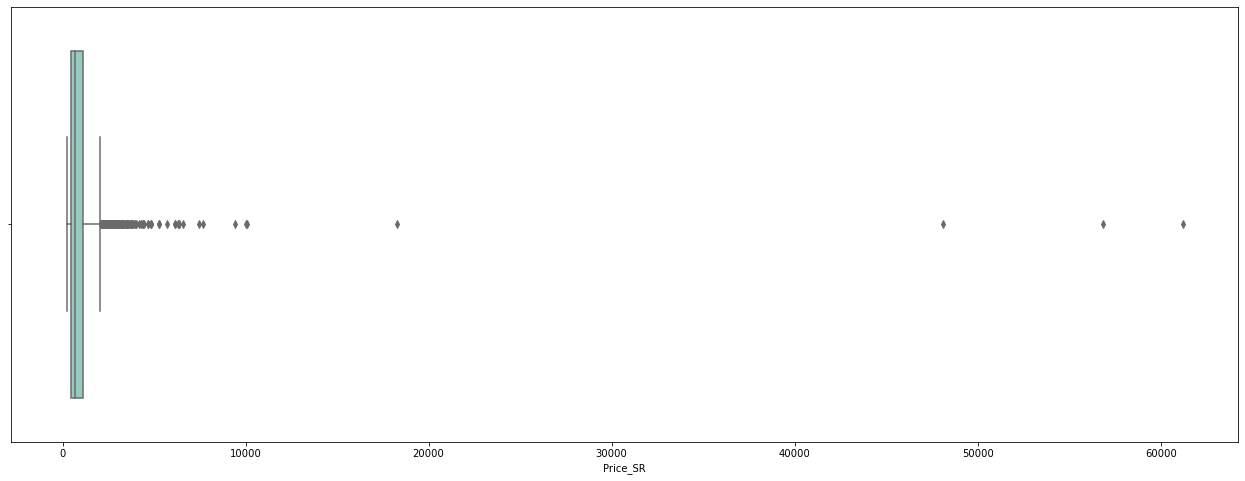

In [80]:
# Check prices outliers - 
phones_new_year=phones_df[['Price_SR']]
plt.figure(figsize=(22,8))
ax = sb.boxplot(x="Price_SR", data=phones_df, palette="Set3")
plt.show()

In [81]:
#drop outliers by removing rows where price is over 8000 SR 
phones_df = phones_df.drop(phones_df[(phones_df['Price_SR'] >=8000)].index)

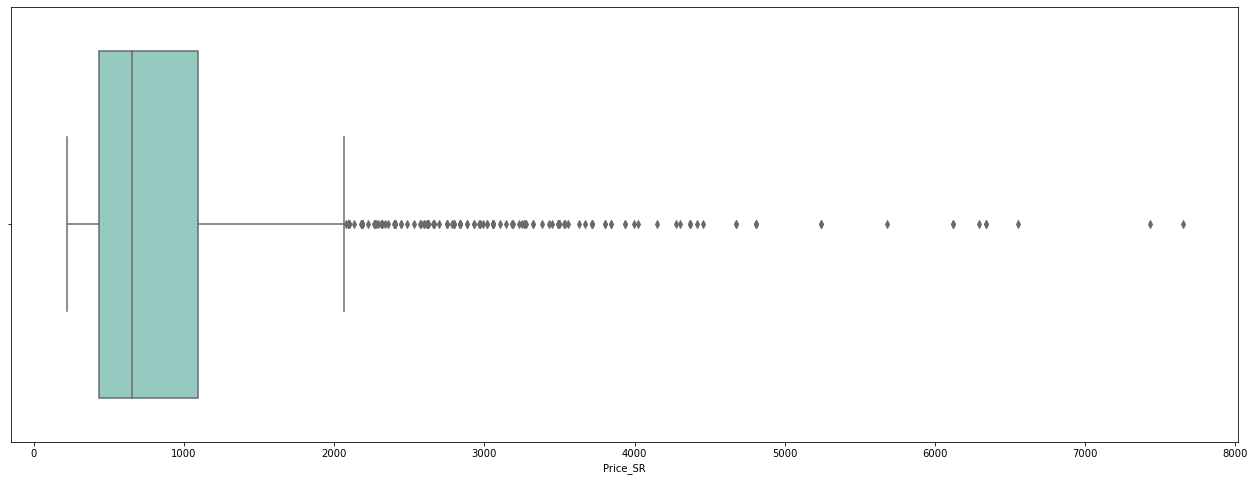

In [82]:
# re-check prices outliers - 
phones_new_year=phones_df[['Price_SR']]
plt.figure(figsize=(22,8))
ax = sb.boxplot(x="Price_SR", data=phones_df, palette="Set3")
plt.show()

In [83]:
phones_df.describe()

,Price_SR,Battery_power,Card_Slot,Length_mm,Width_mm,Depth_mm,Weight,Year,Month_new,Display_size,Main_camera,GPS,Dual_SIM,Likes
count,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00,3265.00
mean,872.22,2356.45,0.83,134.05,69.85,11.29,158.24,2013.13,6.19,4.43,9.89,0.74,0.32,130.93
std,718.21,1618.93,0.38,38.76,27.49,3.56,98.08,4.29,3.36,2.11,17.25,0.44,0.47,317.44
min,218.50,10.00,0.00,38.60,30.00,5.20,2.23,2003.00,1.00,1.00,0.00,0.00,0.00,1.00
25%,437.00,1100.00,1.00,109.00,54.00,8.50,107.50,2010.00,3.00,2.60,2.00,0.00,0.00,17.00
50%,655.50,1880.00,1.00,127.50,65.90,10.40,137.00,2013.00,6.00,4.30,5.00,1.00,0.00,36.00
75%,1092.50,3075.00,1.00,153.80,74.70,13.10,169.80,2016.00,9.00,5.70,12.20,1.00,1.00,102.00
max,7647.50,12000.00,1.00,451.80,275.80,28.20,800.00,2021.00,12.00,18.40,600.00,1.00,1.00,5548.00


In [84]:
phones_df.corr()

,Price_SR,Battery_power,Card_Slot,Length_mm,Width_mm,Depth_mm,Weight,Year,Month_new,Display_size,Main_camera,GPS,Dual_SIM,Likes
Price_SR,1.00,0.45,-0.33,0.38,0.36,-0.36,0.36,0.43,0.04,0.46,0.31,0.32,0.15,0.21
Battery_power,0.45,1.00,-0.03,0.88,0.81,-0.58,0.78,0.64,-0.05,0.90,0.38,0.46,0.31,0.14
Card_Slot,-0.33,-0.03,1.00,0.06,-0.01,-0.01,-0.02,-0.06,-0.05,-0.00,-0.08,0.07,0.09,-0.09
Length_mm,0.38,0.88,0.06,1.00,0.92,-0.58,0.87,0.52,-0.07,0.95,0.27,0.46,0.23,0.12
Width_mm,0.36,0.81,-0.01,0.92,1.00,-0.48,0.93,0.38,-0.06,0.89,0.11,0.39,0.04,0.06
Depth_mm,-0.36,-0.58,-0.01,-0.58,-0.48,1.00,-0.35,-0.73,0.02,-0.66,-0.32,-0.61,-0.42,-0.25
Weight,0.36,0.78,-0.02,0.87,0.93,-0.35,1.00,0.31,-0.06,0.83,0.13,0.33,0.01,0.04
Year,0.43,0.64,-0.06,0.52,0.38,-0.73,0.31,1.00,-0.05,0.65,0.48,0.59,0.60,0.16
Month_new,0.04,-0.05,-0.05,-0.07,-0.06,0.02,-0.06,-0.05,1.00,-0.06,-0.00,-0.01,-0.02,-0.02
Display_size,0.46,0.90,-0.00,0.95,0.89,-0.66,0.83,0.65,-0.06,1.00,0.34,0.56,0.30,0.15


In [85]:
pd.get_dummies(phones_df['Name']).head()

,Apple,BlackBerry,Google,HTC,Honor,Huawei,LG,Motorola,Nokia,Samsung,Sony,alcatel
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
phones_df['Price^2']= phones_df['Price_SR']**2
phones_df['Price_sqrt']= np.sqrt(phones_df['Price_SR'])
phones_df['Price_log']= np.log(phones_df['Price_SR'])

In [87]:
phones_df.corr()[['Price_SR', 'Price^2', 'Price_sqrt', 'Price_log']]

,Price_SR,Price^2,Price_sqrt,Price_log
Price_SR,1.00,0.89,0.97,0.89
Battery_power,0.45,0.27,0.52,0.55
Card_Slot,-0.33,-0.31,-0.30,-0.24
Length_mm,0.38,0.20,0.44,0.48
Width_mm,0.36,0.21,0.42,0.44
Depth_mm,-0.36,-0.20,-0.44,-0.48
Weight,0.36,0.22,0.41,0.43
Year,0.43,0.29,0.47,0.49
Month_new,0.04,0.05,0.04,0.03
Display_size,0.46,0.27,0.54,0.58


In [88]:
phones_df.corr()['Price_log'].sort_values()

Depth_mm        -0.48
Card_Slot       -0.24
Month_new        0.03
Dual_SIM         0.19
Likes            0.26
Main_camera      0.34
Weight           0.43
Width_mm         0.44
GPS              0.48
Length_mm        0.48
Year             0.49
Battery_power    0.55
Display_size     0.58
Price^2          0.63
Price_SR         0.89
Price_sqrt       0.97
Price_log        1.00
Name: Price_log, dtype: float64

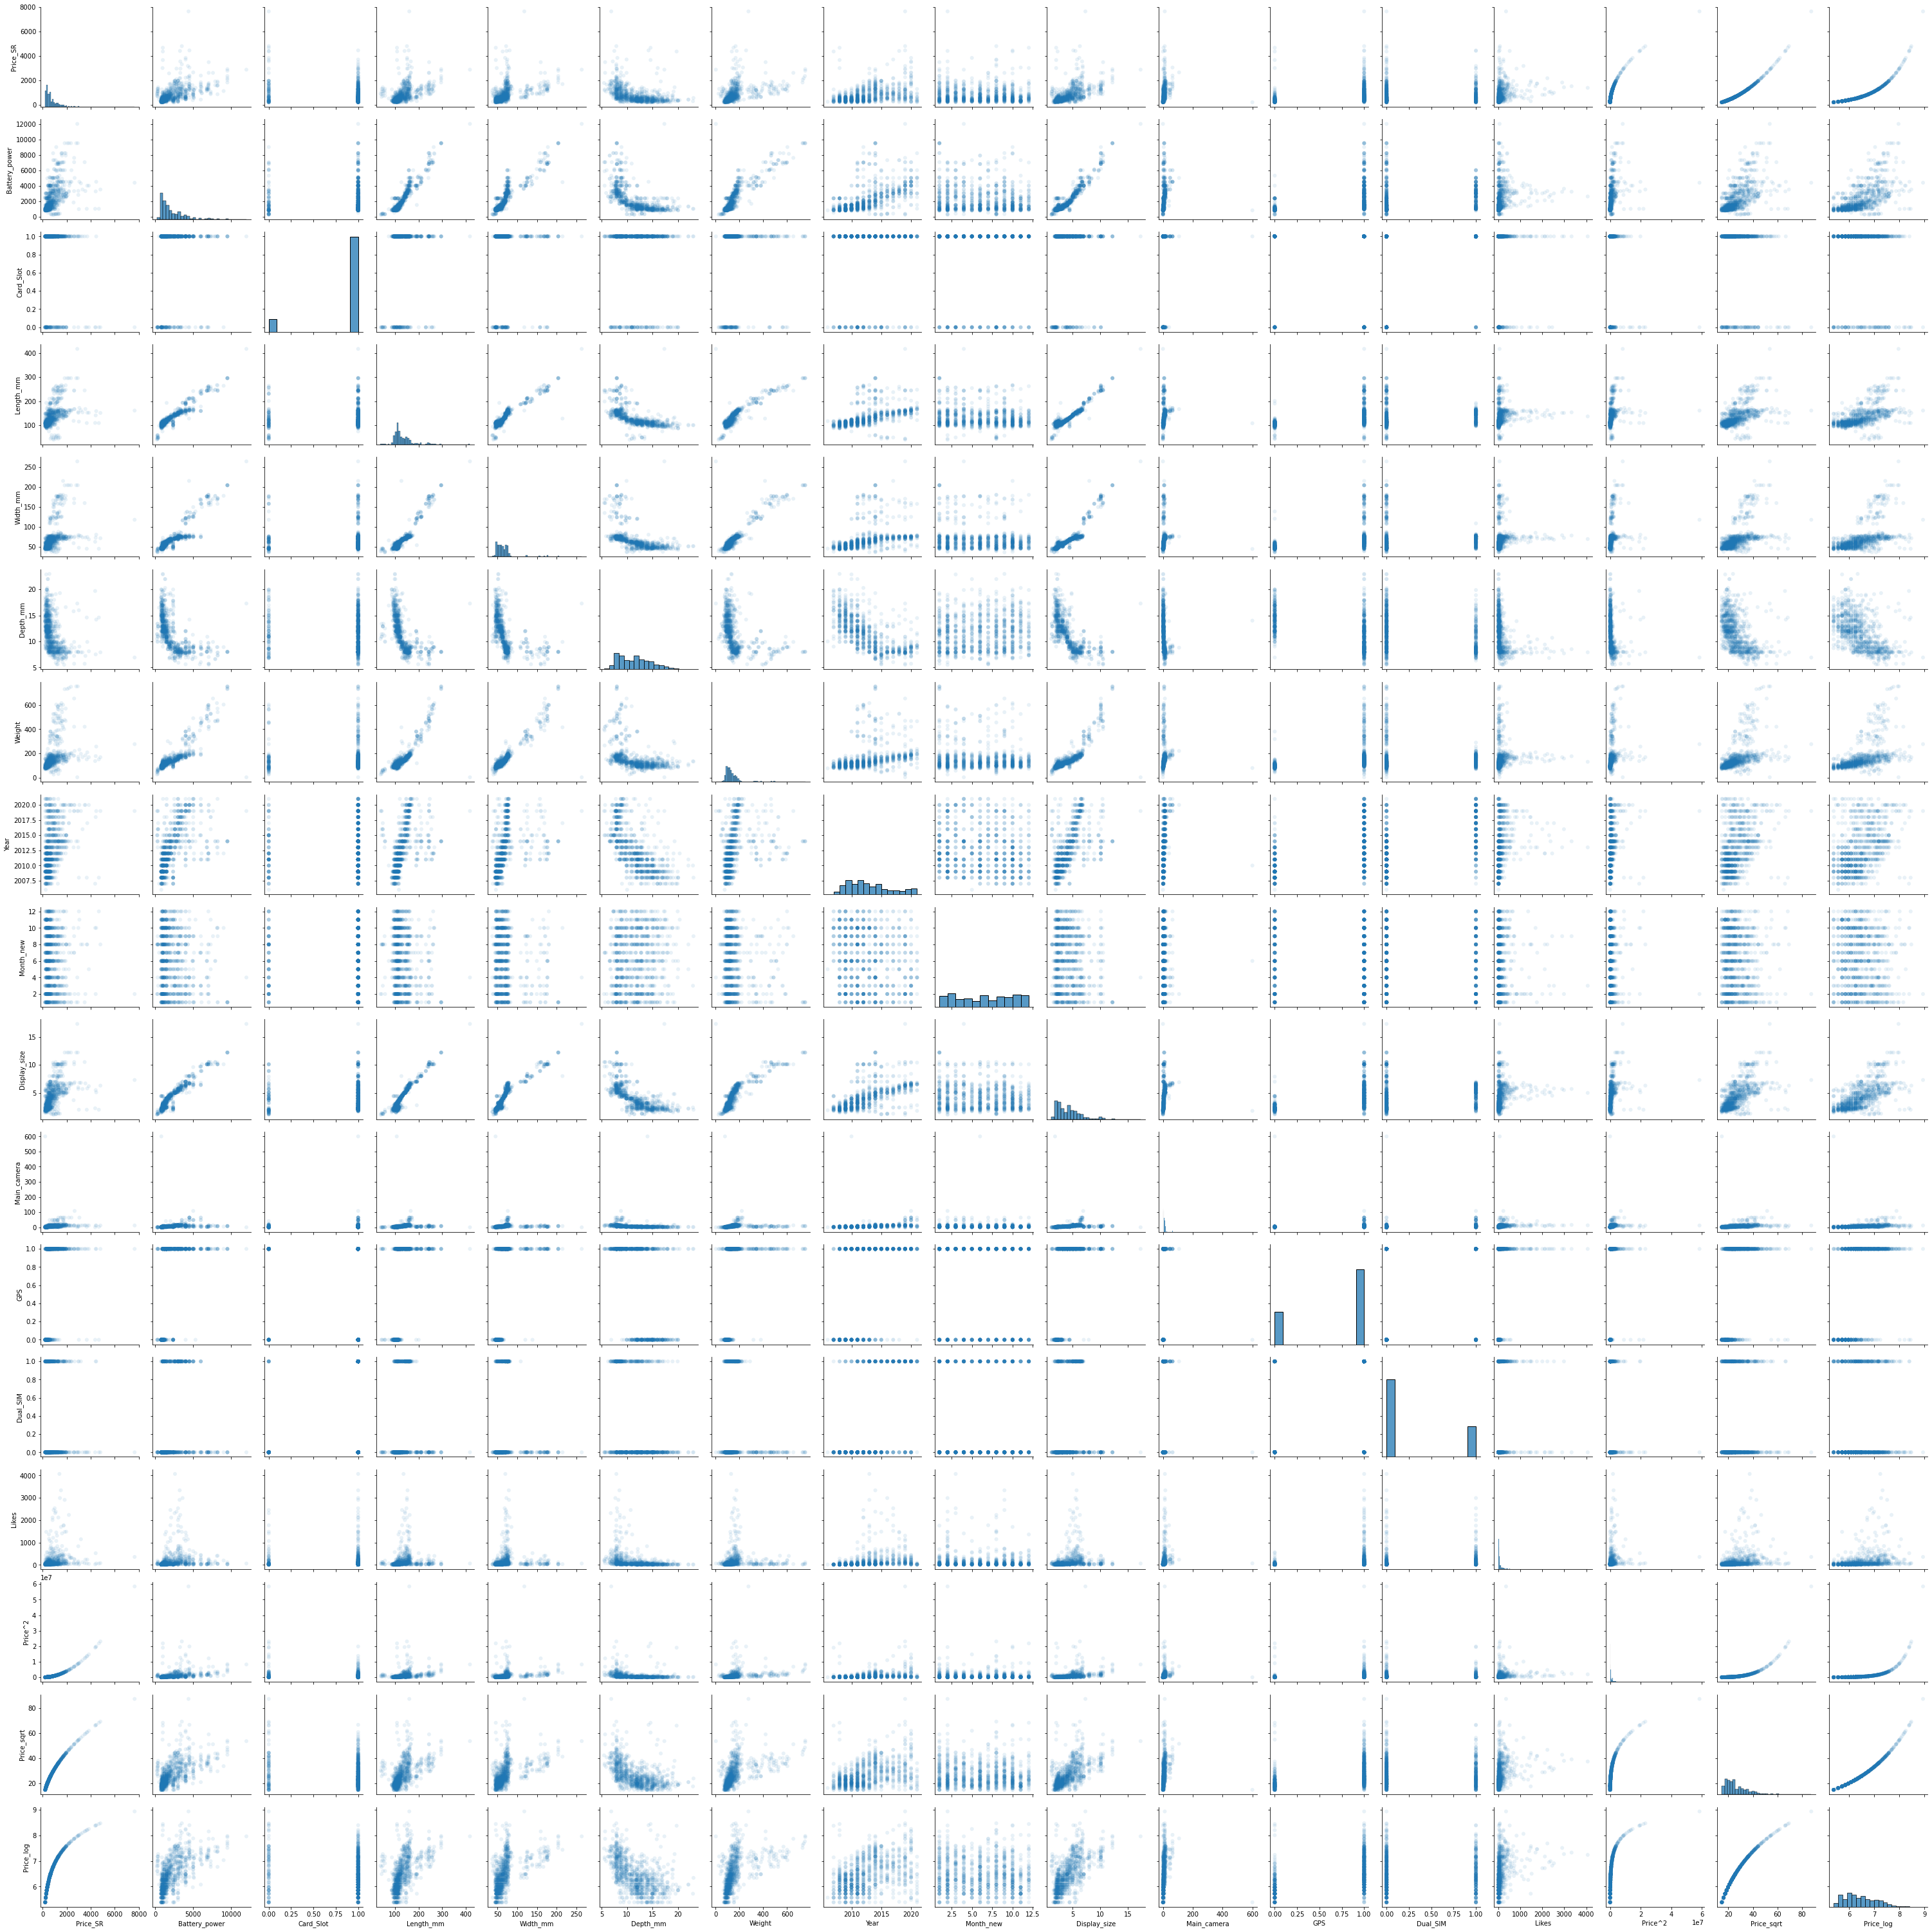

In [89]:
#Pairplot
sb.pairplot(phones_df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

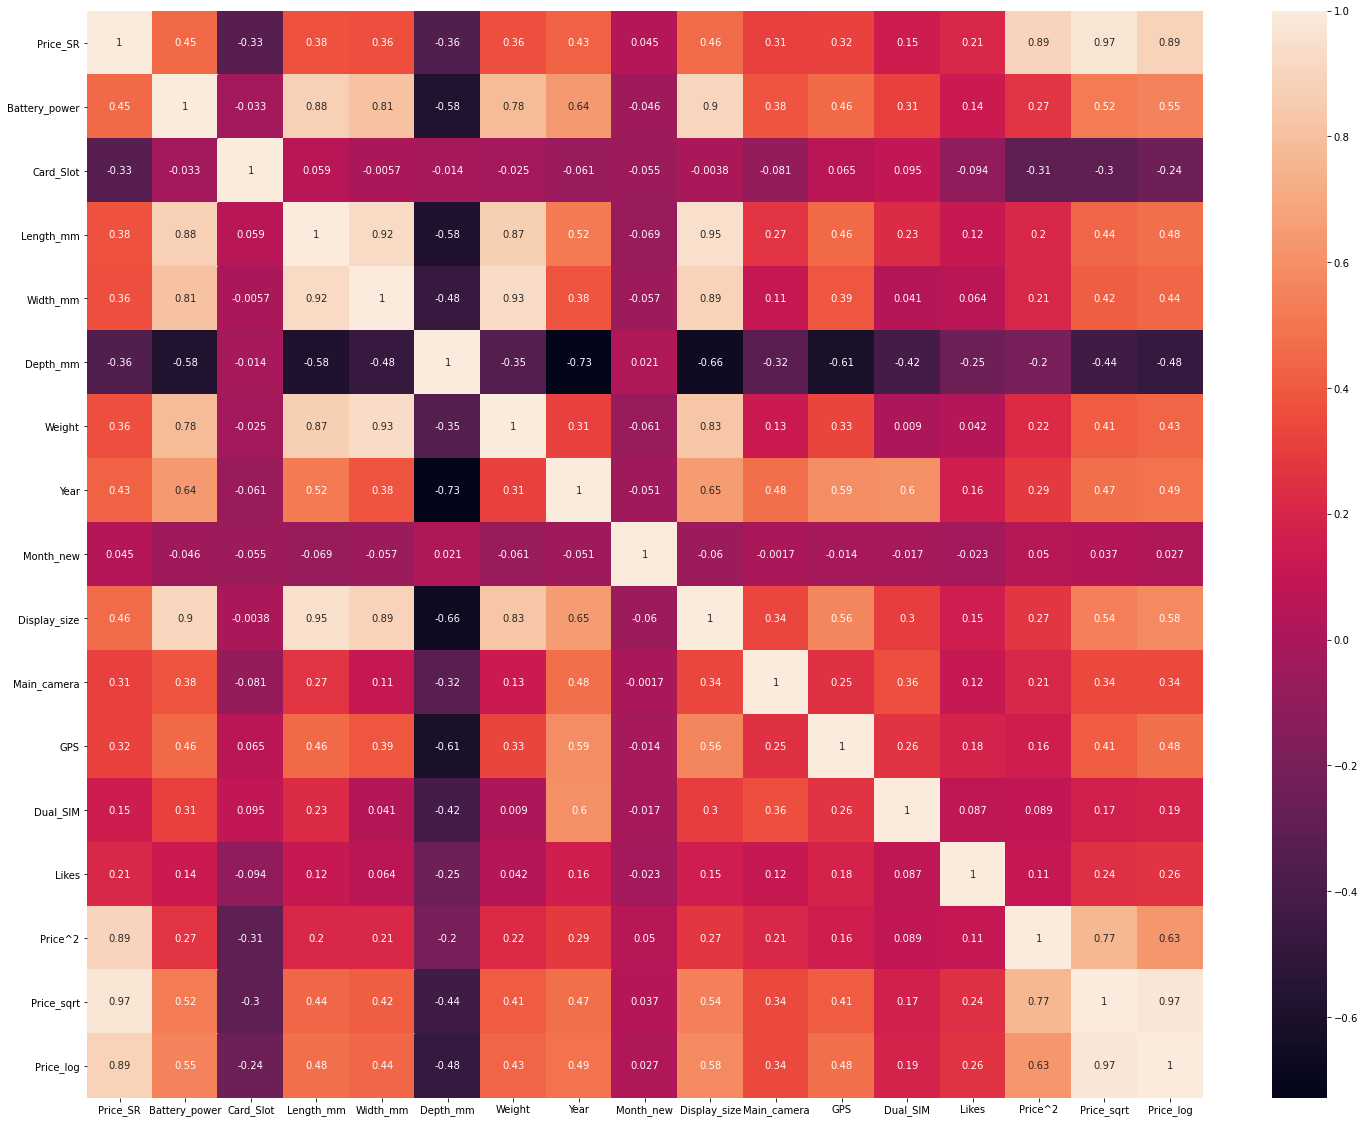

In [90]:
#Heatmap
plt.figure(figsize=(25,20))
sb.heatmap(phones_df.corr(),annot=True); 

In [91]:
# Create our feature matrix (X) and target vector (y)
## Separate our features from our target

X2 = phones_df.loc[:,['Card_Slot', 'Depth_mm',  
                      'Display_size','Main_camera',
                          'Dual_SIM', 'Likes']]
y2 = phones_df['Price_log']


In [92]:
# create full model OLS

model = sm.OLS(y, X)

# Fit the model to our training set
fit2 = model.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Price_log   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          2.226e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:34:12   Log-Likelihood:                         -4680.6
No. Observations:                3265   AIC:                                      9373.
Df Residuals:                    3259   BIC:                                      9410.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Card_Slot        0.3965      0.046      8.698      0.000       0.307       0.486
Depth_mm         0.2932      0.003     93.185      0.000       0.287       0.299
Display_size     0.5534      0.008     72.283      0.000       0.538       0.568
Main_camera      0.0079      0.001      6.846      0.000       0.006       0.010
Dual_SIM         0.4243      0.043      9.954      0.000       0.341       0.508
Likes            0.0009   5.68e-05     15.396      0.000       0.001       0.001
==============================================================================
Omnibus:                      253.535   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1430.943
Skew:                           0.035   Prob(JB):                    1.88e-311
Kurtosis:                       6.242   Cond. No.                         943.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

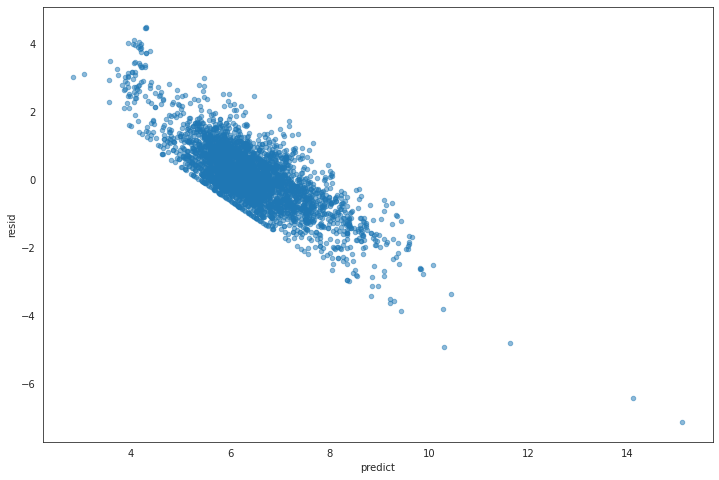

In [93]:
# create residual plot
phones_df['predict']=fit.predict(X2)
phones_df['resid']= y-phones_df.predict
with sb.axes_style('white'):
    plot = phones_df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(12,8))
    
    

#This plot is inconsistent with Assumption #3: (The error term must have constant variance)

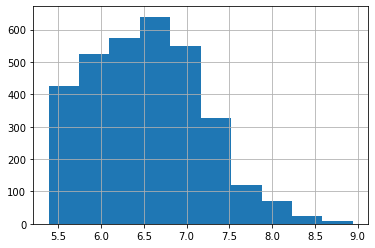

In [94]:
# Create histogram
phones_df.Price_log.hist();

# the rule of thumb is OLS regression isn't too impacted by heteroscedasticity as long as 
# the maximum variance is not greater than four times the minimum variance

In [95]:
#Split data into train, and test

X2_train, X2_test, y2_train, y2_test = split(X2,y2, test_size=0.2, random_state=40)


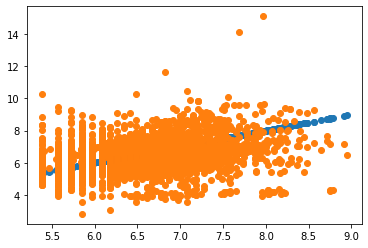

In [96]:
# quick reg plot
plt.scatter(phones_df.Price_log,y2)
plt.scatter(phones_df.Price_log,phones_df.predict);

# The predictions are in orange.

In [97]:
## First Linear Regression Model

# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X2_train, y2_train)
    
# score fit model on test dataset
test_score = lr_model.score(X_test, y_test)  


# report result of Score on test set
print('\nTest R^2 score was:', test_score)


Test R^2 score was: 0.46533841481440574


<AxesSubplot:xlabel='Price_log', ylabel='Count'>

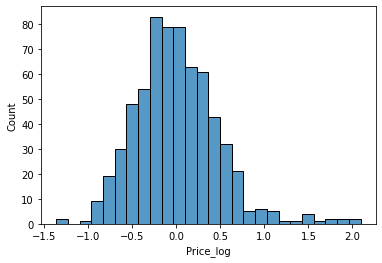

In [98]:
sb.histplot(y2_test - lr_model.predict(X2_test))

In [99]:
(y2_test - lr_model.predict(X2_test)).kurtosis()

2.043954296573887

In [100]:
# report result of MAE on test set
from sklearn.metrics import mean_absolute_error
test_MAE= mean_absolute_error(y_test, lr_model.predict(X2_test))

print('\nTest MAE score was:', test_MAE)

# Check the RMSE (root mean squared error) 
test_SMAE= np.sqrt(mean_absolute_error(y2_test, lr_model.predict(X2_test)))
print('\nTest SMAE score was:', test_SMAE)


Test MAE score was: 0.36294987516152016

Test SMAE score was: 0.6024532140851439


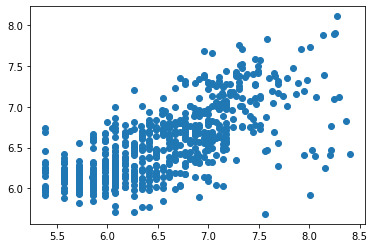

In [101]:
plt.scatter(y_test, lr_model.predict(X2_test))

In [106]:
# Third Model
## Separate our features from our target

X3 = phones_df.loc[:,['Card_Slot', 'Depth_mm',  
                      'Display_size',
                          'Dual_SIM', 'Likes']]
y3 = phones_df['Price_log']

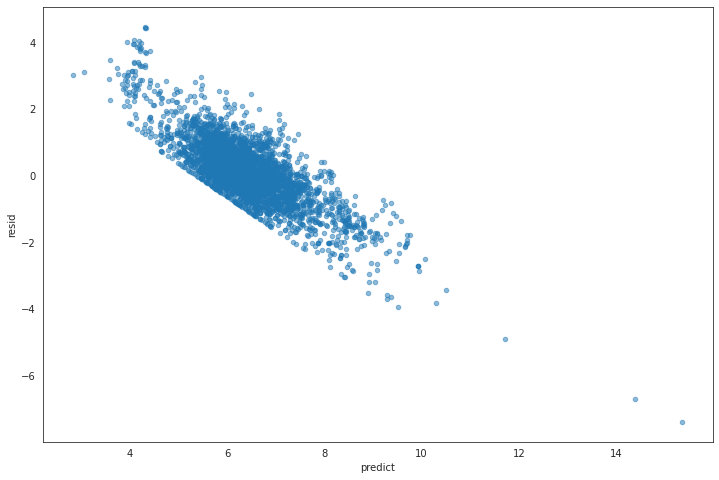

In [108]:
# create residual plot
phones_df['predict']=fit.predict(X3)
phones_df['resid']= y3 - phones_df.predict
with sb.axes_style('white'):
    plot = phones_df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(12,8))
    

In [111]:
#Split data into train, and test

X3_train, X3_test, y3_train, y3_test = split(X3,y3, test_size=0.2, random_state=40)

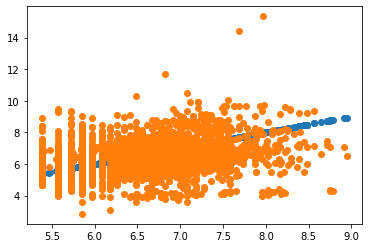

In [112]:
# quick reg plot
plt.scatter(phones_df.Price_log,y3)
plt.scatter(phones_df.Price_log,phones_df.predict);

# The predictions are in orange.

In [113]:
## Third Linear Regression Model

# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X3_train, y3_train)
    
# score fit model on test dataset
test_score = lr_model.score(X3_test, y3_test)  


# report result of Score on test set
print('\nTest R^2 score was:', test_score)


Test R^2 score was: 0.4420937892180067


<AxesSubplot:xlabel='Price_log', ylabel='Count'>

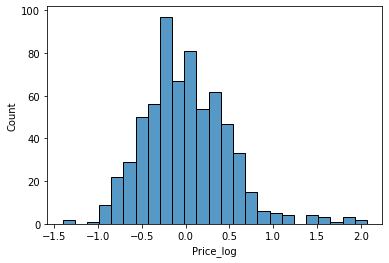

In [114]:
sb.histplot(y3_test - lr_model.predict(X3_test))

In [116]:
(y3_test-lr_model.predict(X3_test)).kurtosis()

1.750844986882639

In [119]:
# report result of MAE on test set

from sklearn.metrics import mean_absolute_error

test_MAE= mean_absolute_error(y3_test, lr_model.predict(X3_test))

print('\nTest MAE score was:', test_MAE)

# Check the RMSE (root mean squared error) 
test_SMAE= np.sqrt(mean_absolute_error(y3_test, lr_model.predict(X3_test)))
print('\nTest SMAE score was:', test_SMAE)


Test MAE score was: 0.3735823356161072

Test SMAE score was: 0.6112138215192022


In [120]:
X4 = phones_df.loc[:,['Battery_power','Card_Slot',
                     'Depth_mm','Weight',
                         'GPS', 'Dual_SIM']]

y4 = phones_df['Price_log']

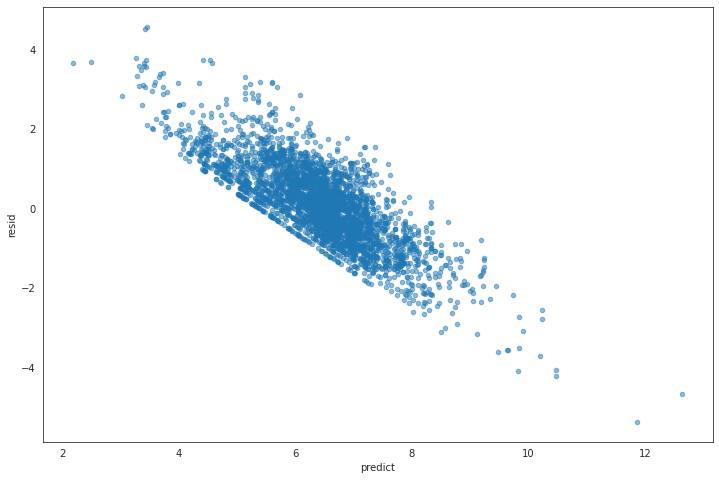

In [123]:
# create residual plot
phones_df['predict']=fit4.predict(X4)
phones_df['resid']= y4 - phones_df.predict
with sb.axes_style('white'):
    plot = phones_df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(12,8))
    
    

In [125]:
#Split data into train, and test

X4_train, X4_test, y4_train, y4_test = split(X4,y4, test_size=0.2, random_state=40)

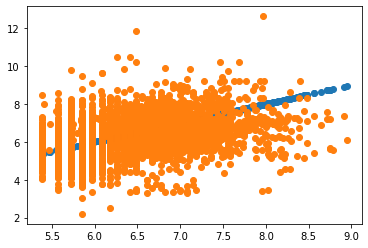

In [126]:
# quick reg plot
plt.scatter(phones_df.Price_log,y4)
plt.scatter(phones_df.Price_log,phones_df.predict);

# The predictions are in orange.

In [133]:
## Fourth Linear Regression Model

# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X4_train, y4_train)
    
# score fit model on test dataset
test_score = lr_model.score(X4_test, y4_test)  


# report result of Score on test set
print('\nTest R^2 score was:', test_score)


Test R^2 score was: 0.43399718960465217


<AxesSubplot:xlabel='Price_log', ylabel='Count'>

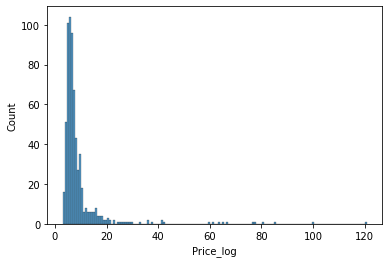

In [129]:
sb.histplot(y_test - lr_model.predict(X_test)) 
#this model is ignored 

In [130]:
(y_test-lr_model.predict(X_test)).kurtosis()

42.98190601856218

In [147]:
X5 = phones_df.loc[:,['Likes','Main_camera','Weight','GPS', 'Dual_SIM','Month_new']]

y5= phones_df['Price_log']

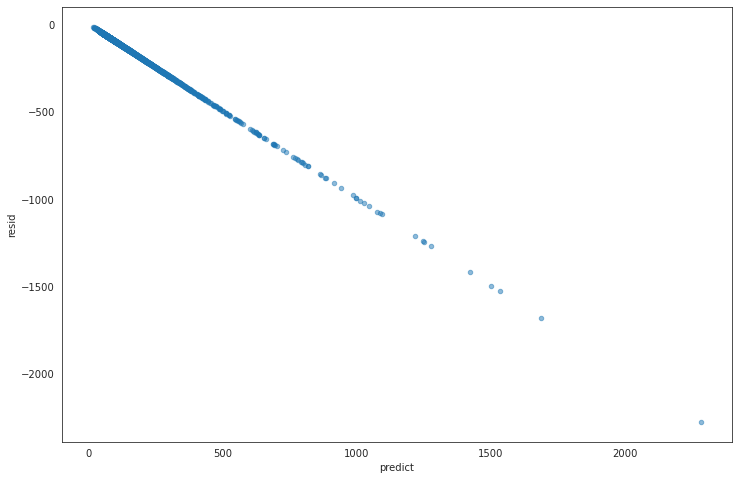

In [148]:
# create residual plot
phones_df['predict']=fit.predict(X5)
phones_df['resid']= y5 - phones_df.predict
with sb.axes_style('white'):
    plot = phones_df.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(12,8))

In [154]:
#Split data into train, and test

X5_train, X5_test, y5_train, y5_test = split(X5,y5, test_size=0.2, random_state=40)

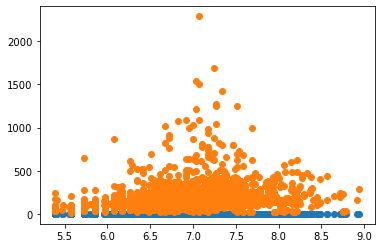

In [155]:
# quick reg plot
plt.scatter(phones_df.Price_log,y5)
plt.scatter(phones_df.Price_log,phones_df.predict);

# The predictions are in orange.

In [156]:
## Fifth Linear Regression Model

# fit linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X5_train, y5_train)
    
# score fit model on test dataset
test_score = lr_model.score(X5_test, y5_test)  


# report result of Score on test set
print('\nTest R^2 score was:', test_score)


Test R^2 score was: 0.40525326406687134


<AxesSubplot:xlabel='Price_log', ylabel='Count'>

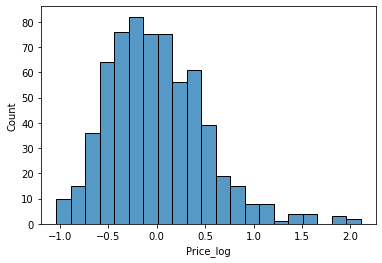

In [157]:
sb.histplot(y_test - lr_model.predict(X5_test))

In [158]:
(y_test-lr_model.predict(X_test)).kurtosis()

9.910214531805215

In [159]:
# report result of MAE on test set
from sklearn.metrics import mean_absolute_error
test_MAE= mean_absolute_error(y_test, lr_model.predict(X_test))

print('\nTest MAE score was:', test_MAE)

# Check the RMSE (root mean squared error) 
test_SMAE= np.sqrt(mean_absolute_error(y_test, lr_model.predict(X_test)))
print('\nTest SMAE score was:', test_SMAE)


Test MAE score was: 5.301358743635698

Test SMAE score was: 2.302467967993409


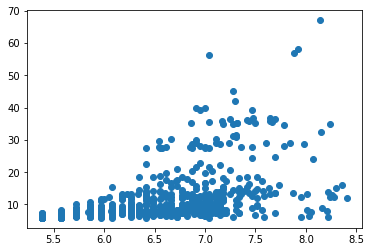

In [160]:
plt.scatter(y_test, lr_model.predict(X_test))